## Part 1: Using real world data set of crimes in Portland 2017

# **Introduction: Business Problem**
Portland is well known for having an established coffee culture.

Portland currently has over 30 coffee roasters.

Thus, it is a desirable location for any small business owner to open a coffee shop.

Despite it's desirable location, Portland is considered the second most dangerous city in Oregon

The aim of this project is to find a spot where a small business in Portland Oregon can safely open a coffee shop by finding neigborhoods in Portland with low crime rates that will welcome a new coffee shop.

**There are four major steps to this project**

(1) Use the data set from Kaggle to find the safest neighbourhoods: https://www.kaggle.com/katzwigmore/portland-oregon-crime-data

(2) Gather additional information about the neighbourhoods from wikipedia: https://en.wikipedia.org/wiki/Neighborhoods_of_Portland,_Oregon

(3) Create a new consolidated dataset of the Neighborhoods, along with their boroughs, crime data and the respective Neighbourhood's co-ordinates

(4) Create a new consolidated dataset of the Neighborhoods, boroughs, and the most common venues using the Four-Square API. Cluster the neighbourhoods and present the findings by plotting it on maps using Folium.

# **Data**
Crime data Set url: [https://www.kaggle.com/katzwigmore/portland-oregon-crime-data](https://www.kaggle.com/katzwigmore/portland-oregon-crime-data)

Since .csv file was too large to import, only data from 2017 was analyzed

**Properties of Crime Report Used:**
*  Neighborhood- Neighborhood of crime reported
*  Occur Date- Date of crime occurance
*  Offense Type- Type of *crime*



***Import all necessary libraries***

In [1]:
import numpy as np
import pandas as pd

#Command to install OpenCage Geocoder for fetching Lat and Lng of Neighborhood
!pip install opencage

#Importing OpenCage Geocoder
from opencage.geocoder import OpenCageGeocode

# use the inline backend to generate the plots within the browser
%matplotlib inline 

#Importing Matplot lib and associated packages to perform Data Visualisation and Exploratory Data Analysis
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#Importing folium to visualise Maps and plot based on Lat and Lng
import folium

#Requests to request web pages by making get requests to FourSquare REST Client
import requests

#To normalise data returned by FourSquare API
from pandas.io.json import json_normalize

#Importing KMeans from SciKit library to Classify neighborhoods into clusters
from sklearn.cluster import KMeans

print('Libraries imported')

Matplotlib version:  3.2.2
Libraries imported


***Import the crime report***



In [130]:
port_crime_df = pd.read_csv('https://raw.githubusercontent.com/talsegal01/Coursera_Capstone/master/Portland%20Crime%20Data%202017%20Only.csv', index_col=None)
#Dropping Unnecessary columns
port_crime_df.drop(['Occur Time', 'Offense Count', 'OpenDataLon', 'OpenDataLat','Address','Case Number', 'Crime Against', 'Number of Records', 'Occur Month Year', 'Report Date','ReportMonthYear','Offense Category','OpenDataX','OpenDataY'], axis = 1, inplace = True)
port_crime_df.head()

,Neighborhood,Occur Date,Offense Type
0,South Portland,12/31/2017,Identity Theft
1,Brooklyn,12/31/2017,Motor Vehicle Theft
2,Centennial,12/31/2017,Motor Vehicle Theft
3,Cully,12/31/2017,Motor Vehicle Theft
4,Cully,12/31/2017,Motor Vehicle Theft


In [131]:
#Dropping rows without neighborhoods specified
port_crime_df['Neighborhood'].replace('', np.nan, inplace=True)
port_crime_df.dropna(subset=['Neighborhood'], inplace=True)
port_crime_df['Neighborhood'].replace('Old Town/Chinatown', 'Old Town Chinatown', inplace=True)
port_crime_df['Neighborhood'].value_counts()

Downtown               4006
Hazelwood              3814
Powellhurst-Gilbert    2226
Lents                  2204
Old Town Chinatown     2072
                       ... 
Arnold Creek             30
Woodland Park            23
Crestwood                19
Marshall Park            10
Healy Heights             6
Name: Neighborhood, Length: 96, dtype: int64

# Part 2: Using the neighbourhood information from wikipedia

# **Data 2**

Tying the neighborhoods in Portland to Sections

Data Source: [https://en.wikipedia.org/wiki/Neighborhoods_of_Portland,_Oregon](https://en.wikipedia.org/wiki/Neighborhoods_of_Portland,_Oregon)

In [132]:
column_names = ['Neighborhood', 'Section'] 
port_tant = pd.DataFrame(columns=column_names)
port_tant['Neighborhood']= port_crime_df['Neighborhood'].unique()
tant_dict={'Northwest Portland':('Forest Park','Hillside','Linnton','Northwest','Northwest Heights','Northwest Industrial','Old Town Chinatown'), 'Southwest Portland':('Arnold Creek','Ashcreek','Bridlemile','Collins View','Crestwood','Far Southwest','Hayhurst','Hillsdale','Homestead','Maplewood','Markham','Marshall Park','Multnomah','South Burlingame','South Portland','Southwest Hills','West Portland Park','Healy Heights'), 'North Portland':('Arbor Lodge','Bridgeton','Cathedral Park','East Columbia','Hayden Island','Kenton','Overlook','Piedmont','Portsmouth','St. Johns','University Park'), 'Northeast Portland':('Alameda','Boise','Concordia','Eliot','Humboldt','Irvington','King','Lloyd District','Sabin','Sullivan\'s Gulch','Vernon','Woodlawn','Beaumont-Wilshire','Cully','Grant Park','Hollywood','Madison South','Rose City Park','Roseway','Sumner','Sunderland','Argay','Parkrose','Parkrose Heights','Russell','Wilkes','Woodland Park'), 'Southeast Portland':('Centennial', 'Lents', 'Mill Park', 'Pleasant Valley', 'Powellhurst-Gilbert','Ardenwald-Johnson Creek','Brentwood-Darlington','Brooklyn','Buckman','Creston-Kenilworth','Eastmoreland','Foster-Powell','Hosford-Abernethy','Kerns','Laurelhurst','Montavilla','Mt. Scott-Arleta','Mt. Tabor','North Tabor','Reed','Richmond','Sellwood-Moreland','South Tabor','Sunnyside','Woodstock')}
# list out keys and values separately 
key_list = list(tant_dict.keys()) 
val_list = list(tant_dict.values())
for x in range(96):
  val = port_tant.loc[x, 'Neighborhood']
  for w in range(5):
    if val in val_list[w]:
      key_index=w
  port_tant.loc[x,'Section'] = key_list[key_index]
port_tant.head(30)

,Neighborhood,Section
0,South Portland,Southwest Portland
1,Brooklyn,Southeast Portland
2,Centennial,Southeast Portland
3,Cully,Northeast Portland
4,Downtown,Northeast Portland
5,Foster-Powell,Southeast Portland
6,Hazelwood,Southeast Portland
7,Lents,Southeast Portland
8,Wilkes,Northeast Portland
9,Madison South,Northeast Portland


***Merge Sections with neighborhoods***

In [133]:
port_crime = pd.merge(port_crime_df,port_tant, on='Neighborhood')
port_crime

,Neighborhood,Occur Date,Offense Type,Section
0,South Portland,12/31/2017,Identity Theft,Southwest Portland
1,South Portland,12/30/2017,Vandalism,Southwest Portland
2,South Portland,12/30/2017,Theft From Motor Vehicle,Southwest Portland
3,South Portland,12/29/2017,All Other Larceny,Southwest Portland
4,South Portland,12/29/2017,Theft From Motor Vehicle,Southwest Portland
...,...,...,...,...
58666,Markham,3/17/2017,Identity Theft,Southwest Portland
58667,Markham,2/16/2017,All Other Larceny,Southwest Portland
58668,Markham,2/7/2017,Identity Theft,Southwest Portland
58669,Markham,2/6/2017,Motor Vehicle Theft,Southwest Portland


***Drop Invalid Sections***

In [134]:
port_crime.dropna(inplace=True)
port_crime['Section'].value_counts()

Southeast Portland    25588
Northeast Portland    18076
North Portland         6176
Southwest Portland     4561
Northwest Portland     4270
Name: Section, dtype: int64

# **Methodology**
# Two parts for analysis: 
1. Using exploratory data analysis to help with visualizing the crime reports in different sections to identify the safeset section. Further explore this section for common venues 
2. Using k-means clustering as a form of machine learning to group data based on existing venues.

***Pivot Table to understand crimes per Section***

In [135]:
port_crime_cat = pd.pivot_table(port_crime,
                               values=['Occur Date'],
                               index=['Section'],
                               columns=['Offense Type'],
                               aggfunc=len,
                               fill_value=0,
                               margins=True)
port_crime_cat

Occur Date                    ...                  
Offense Type       Aggravated Assault All Other Larceny  ... Wire Fraud    All
Section                                                  ...                  
North Portland                    198               784  ...          0   6176
Northeast Portland                572              2195  ...          1  18076
Northwest Portland                164               622  ...          0   4270
Southeast Portland                817              3097  ...          2  25588
Southwest Portland                107               591  ...          1   4561
All                              1858              7289  ...          4  58671

[6 rows x 45 columns]

In [136]:
port_crime_cat.reset_index(inplace = True)
port_crime_cat.columns = port_crime_cat.columns.map(''.join)
port_crime_cat.head()

,Section,Occur DateAggravated Assault,Occur DateAll Other Larceny,Occur DateAnimal Cruelty,Occur DateArson,Occur DateAssisting or Promoting Prostitution,Occur DateBurglary,Occur DateCommercial Sex Acts,Occur DateCounterfeiting/Forgery,Occur DateCredit Card/ATM Fraud,Occur DateDrug Equipment Violations,Occur DateDrug/Narcotic Violations,Occur DateEmbezzlement,Occur DateExtortion/Blackmail,Occur DateFalse Pretenses/Swindle/Confidence Game,Occur DateFondling,Occur DateHacking/Computer Invasion,Occur DateIdentity Theft,Occur DateImpersonation,Occur DateIncest,Occur DateIntimidation,Occur DateKidnapping/Abduction,Occur DateMotor Vehicle Theft,Occur DateMurder and Non-negligent Manslaughter,Occur DatePocket-Picking,Occur DatePornography/Obscene Material,Occur DateProstitution,Occur DatePurchasing Prostitution,Occur DatePurse-Snatching,Occur DateRape,Occur DateRobbery,Occur DateSexual Assault With An Object,Occur DateShoplifting,Occur DateSimple Assault,Occur DateSodomy,Occur DateStatutory Rape,Occur DateStolen Property Offenses,Occur DateTheft From Building,Occur DateTheft From Coin-Operated Machine or Device,Occur DateTheft From Motor Vehicle,Occur DateTheft of Motor Vehicle Parts or Accessories,Occur DateVandalism,Occur DateWeapons Law Violations,Occur DateWelfare Fraud,Occur DateWire Fraud,Occur DateAll
0,North Portland,198,784,1,35,3,418,0,67,80,4,180,16,0,153,23,4,151,0,0,216,10,623,0,14,1,0,0,10,28,109,1,547,341,5,1,3,149,1,1244,157,562,37,0,0,6176
1,Northeast Portland,572,2195,5,90,10,1223,1,202,215,3,370,41,7,386,56,12,412,6,0,754,29,2074,8,46,7,107,8,46,68,338,3,955,1170,16,2,25,505,5,3450,527,1985,140,1,1,18076
2,Northwest Portland,164,622,2,28,1,209,0,28,32,0,439,6,0,65,16,1,93,2,0,214,8,205,3,31,0,0,0,20,25,75,1,104,317,13,1,4,164,0,830,62,435,50,0,0,4270
3,Southeast Portland,817,3097,13,128,4,2172,3,324,269,4,593,39,13,563,79,15,597,4,1,1025,24,3903,11,45,10,75,6,52,113,448,8,1339,1667,24,10,50,593,23,3703,806,2707,208,1,2,25588
4,Southwest Portland,107,591,1,23,0,322,0,58,61,0,78,9,2,124,22,5,150,0,0,162,4,400,1,17,0,8,0,11,27,63,1,342,264,5,0,2,157,3,935,101,489,15,0,1,4561


In [137]:
list_col=[]
for col in port_crime_cat.columns: 
  recol=col.replace('Occur Date','')
  list_col+=[recol]
port_crime_cat.columns=list_col
port_crime_cat

,Section,Aggravated Assault,All Other Larceny,Animal Cruelty,Arson,Assisting or Promoting Prostitution,Burglary,Commercial Sex Acts,Counterfeiting/Forgery,Credit Card/ATM Fraud,Drug Equipment Violations,Drug/Narcotic Violations,Embezzlement,Extortion/Blackmail,False Pretenses/Swindle/Confidence Game,Fondling,Hacking/Computer Invasion,Identity Theft,Impersonation,Incest,Intimidation,Kidnapping/Abduction,Motor Vehicle Theft,Murder and Non-negligent Manslaughter,Pocket-Picking,Pornography/Obscene Material,Prostitution,Purchasing Prostitution,Purse-Snatching,Rape,Robbery,Sexual Assault With An Object,Shoplifting,Simple Assault,Sodomy,Statutory Rape,Stolen Property Offenses,Theft From Building,Theft From Coin-Operated Machine or Device,Theft From Motor Vehicle,Theft of Motor Vehicle Parts or Accessories,Vandalism,Weapons Law Violations,Welfare Fraud,Wire Fraud,All
0,North Portland,198,784,1,35,3,418,0,67,80,4,180,16,0,153,23,4,151,0,0,216,10,623,0,14,1,0,0,10,28,109,1,547,341,5,1,3,149,1,1244,157,562,37,0,0,6176
1,Northeast Portland,572,2195,5,90,10,1223,1,202,215,3,370,41,7,386,56,12,412,6,0,754,29,2074,8,46,7,107,8,46,68,338,3,955,1170,16,2,25,505,5,3450,527,1985,140,1,1,18076
2,Northwest Portland,164,622,2,28,1,209,0,28,32,0,439,6,0,65,16,1,93,2,0,214,8,205,3,31,0,0,0,20,25,75,1,104,317,13,1,4,164,0,830,62,435,50,0,0,4270
3,Southeast Portland,817,3097,13,128,4,2172,3,324,269,4,593,39,13,563,79,15,597,4,1,1025,24,3903,11,45,10,75,6,52,113,448,8,1339,1667,24,10,50,593,23,3703,806,2707,208,1,2,25588
4,Southwest Portland,107,591,1,23,0,322,0,58,61,0,78,9,2,124,22,5,150,0,0,162,4,400,1,17,0,8,0,11,27,63,1,342,264,5,0,2,157,3,935,101,489,15,0,1,4561
5,All,1858,7289,22,304,18,4344,4,679,657,11,1660,111,22,1291,196,37,1403,12,1,2371,75,7205,23,153,18,190,14,139,261,1033,14,3287,3759,63,14,84,1568,32,10162,1653,6178,450,2,4,58671


In [10]:
port_crime_cat.describe()

,Aggravated Assault,All Other Larceny,Animal Cruelty,Arson,Assisting or Promoting Prostitution,Burglary,Counterfeiting/Forgery,Credit Card/ATM Fraud,Drug Equipment Violations,Drug/Narcotic Violations,Embezzlement,Extortion/Blackmail,False Pretenses/Swindle/Confidence Game,Hacking/Computer Invasion,Identity Theft,Impersonation,Intimidation,Motor Vehicle Theft,Murder and Non-negligent Manslaughter,Pocket-Picking,Pornography/Obscene Material,Prostitution,Purchasing Prostitution,Purse-Snatching,Robbery,Shoplifting,Simple Assault,Stolen Property Offenses,Theft From Building,Theft From Coin-Operated Machine or Device,Theft From Motor Vehicle,Theft of Motor Vehicle Parts or Accessories,Vandalism,Weapons Law Violations,Welfare Fraud,Wire Fraud,All
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,421.666667,2351.333333,6.666667,99.000000,3.666667,1413.666667,223.666667,209.333333,3.666667,545.333333,36.333333,5.333333,419.666667,12.333333,454.000000,3.666667,425.000000,2389.000000,0.333333,49.000000,5.333333,62.333333,4.666667,42.666667,317.000000,1094.000000,618.000000,27.333333,498.333333,10.666667,3353.666667,547.000000,1932.666667,140.000000,0.666667,1.333333,17728.333333
std,450.355267,2500.747702,7.737355,104.873257,4.082483,1563.814524,244.993605,223.244858,4.033196,564.207645,38.531372,6.121002,449.959850,13.170674,482.109116,4.320494,448.377966,2720.075514,0.516398,49.642724,6.562520,75.476266,5.750362,44.880582,340.332191,1158.737416,653.501033,32.531011,521.527628,13.456101,3517.722653,608.230877,2080.904963,152.841094,0.816497,1.505545,18994.036871
min,70.000000,568.000000,1.000000,23.000000,0.000000,205.000000,28.000000,32.000000,0.000000,78.000000,6.000000,0.000000,62.000000,1.000000,92.000000,0.000000,99.000000,205.000000,0.000000,14.000000,0.000000,0.000000,0.000000,9.000000,61.000000,104.000000,141.000000,2.000000,145.000000,0.000000,827.000000,62.000000,428.000000,14.000000,0.000000,0.000000,4008.000000
25%,126.250000,653.500000,1.250000,29.500000,1.000000,337.750000,60.000000,63.000000,0.750000,221.750000,10.500000,0.500000,127.250000,4.250000,147.750000,0.250000,117.250000,454.750000,0.000000,19.750000,0.000000,1.750000,0.000000,12.250000,80.750000,392.500000,167.750000,2.500000,152.000000,1.500000,999.250000,114.250000,484.250000,38.250000,0.000000,0.250000,4545.750000
50%,277.000000,1443.500000,3.000000,61.000000,2.500000,799.500000,133.500000,140.500000,3.500000,400.000000,27.000000,4.500000,265.500000,8.500000,271.000000,2.500000,300.000000,1344.000000,0.000000,36.000000,3.500000,40.000000,3.000000,30.500000,209.000000,749.500000,424.000000,14.500000,315.500000,4.000000,2321.000000,338.500000,1199.500000,88.500000,0.500000,1.000000,11037.000000
75%,493.000000,2767.500000,10.000000,115.000000,4.750000,1889.750000,288.750000,243.500000,4.000000,546.750000,39.750000,7.000000,505.000000,14.250000,533.750000,5.500000,464.750000,3422.750000,0.750000,44.000000,8.500000,98.500000,7.500000,46.500000,377.750000,1241.500000,693.000000,43.000000,545.000000,18.500000,3605.250000,731.500000,2343.750000,177.750000,1.000000,1.750000,21300.000000
max,1265.000000,7054.000000,20.000000,297.000000,11.000000,4241.000000,671.000000,628.000000,11.000000,1636.000000,109.000000,16.000000,1259.000000,37.000000,1362.000000,11.000000,1275.000000,7167.000000,1.000000,147.000000,16.000000,187.000000,14.000000,128.000000,951.000000,3282.000000,1854.000000,82.000000,1495.000000,32.000000,10061.000000,1641.000000,5798.000000,420.000000,2.000000,4.000000,53185.000000


***Pivot Table to understand crimes per neighborhood***

In [138]:
port_crime_neigh = pd.pivot_table(port_crime,
                               values=['Occur Date'],
                               index=['Neighborhood'],
                               columns=['Offense Type'],
                               aggfunc=len,
                               fill_value=0,
                               margins=True)
port_crime_neigh.reset_index(inplace = True)
port_crime_neigh.columns = port_crime_neigh.columns.map(''.join)
port_crime_neigh.head()

,Neighborhood,Occur DateAggravated Assault,Occur DateAll Other Larceny,Occur DateAnimal Cruelty,Occur DateArson,Occur DateAssisting or Promoting Prostitution,Occur DateBurglary,Occur DateCommercial Sex Acts,Occur DateCounterfeiting/Forgery,Occur DateCredit Card/ATM Fraud,Occur DateDrug Equipment Violations,Occur DateDrug/Narcotic Violations,Occur DateEmbezzlement,Occur DateExtortion/Blackmail,Occur DateFalse Pretenses/Swindle/Confidence Game,Occur DateFondling,Occur DateHacking/Computer Invasion,Occur DateIdentity Theft,Occur DateImpersonation,Occur DateIncest,Occur DateIntimidation,Occur DateKidnapping/Abduction,Occur DateMotor Vehicle Theft,Occur DateMurder and Non-negligent Manslaughter,Occur DatePocket-Picking,Occur DatePornography/Obscene Material,Occur DateProstitution,Occur DatePurchasing Prostitution,Occur DatePurse-Snatching,Occur DateRape,Occur DateRobbery,Occur DateSexual Assault With An Object,Occur DateShoplifting,Occur DateSimple Assault,Occur DateSodomy,Occur DateStatutory Rape,Occur DateStolen Property Offenses,Occur DateTheft From Building,Occur DateTheft From Coin-Operated Machine or Device,Occur DateTheft From Motor Vehicle,Occur DateTheft of Motor Vehicle Parts or Accessories,Occur DateVandalism,Occur DateWeapons Law Violations,Occur DateWelfare Fraud,Occur DateWire Fraud,Occur DateAll
0,Alameda,2,22,0,0,0,20,0,1,0,0,0,0,0,2,0,0,8,0,0,4,0,31,0,0,0,0,0,0,2,0,0,0,5,0,0,0,0,0,26,12,12,0,0,0,147
1,Arbor Lodge,14,67,0,3,0,35,0,5,5,0,12,1,0,15,2,2,15,0,0,19,3,54,0,0,0,0,0,0,0,9,0,111,22,1,0,0,13,0,69,17,46,1,0,0,541
2,Ardenwald,1,4,0,0,0,4,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,4,0,0,0,0,0,0,1,1,0,0,3,0,0,0,1,0,14,1,5,1,0,0,43
3,Argay,15,80,0,3,0,60,0,14,7,0,8,0,0,16,2,0,16,0,0,26,2,129,0,0,0,0,0,1,2,3,0,36,31,0,0,0,22,0,120,45,73,5,0,0,716
4,Arlington Heights,1,2,0,1,0,3,0,1,1,0,1,0,0,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,1,0,33,0,6,1,0,0,59


In [139]:
list_col=[]
for col in port_crime_neigh.columns: 
  recol=col.replace('Occur Date','')
  list_col+=[recol]
port_crime_neigh.columns=list_col
port_crime_neigh

,Neighborhood,Aggravated Assault,All Other Larceny,Animal Cruelty,Arson,Assisting or Promoting Prostitution,Burglary,Commercial Sex Acts,Counterfeiting/Forgery,Credit Card/ATM Fraud,Drug Equipment Violations,Drug/Narcotic Violations,Embezzlement,Extortion/Blackmail,False Pretenses/Swindle/Confidence Game,Fondling,Hacking/Computer Invasion,Identity Theft,Impersonation,Incest,Intimidation,Kidnapping/Abduction,Motor Vehicle Theft,Murder and Non-negligent Manslaughter,Pocket-Picking,Pornography/Obscene Material,Prostitution,Purchasing Prostitution,Purse-Snatching,Rape,Robbery,Sexual Assault With An Object,Shoplifting,Simple Assault,Sodomy,Statutory Rape,Stolen Property Offenses,Theft From Building,Theft From Coin-Operated Machine or Device,Theft From Motor Vehicle,Theft of Motor Vehicle Parts or Accessories,Vandalism,Weapons Law Violations,Welfare Fraud,Wire Fraud,All
0,Alameda,2,22,0,0,0,20,0,1,0,0,0,0,0,2,0,0,8,0,0,4,0,31,0,0,0,0,0,0,2,0,0,0,5,0,0,0,0,0,26,12,12,0,0,0,147
1,Arbor Lodge,14,67,0,3,0,35,0,5,5,0,12,1,0,15,2,2,15,0,0,19,3,54,0,0,0,0,0,0,0,9,0,111,22,1,0,0,13,0,69,17,46,1,0,0,541
2,Ardenwald,1,4,0,0,0,4,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,4,0,0,0,0,0,0,1,1,0,0,3,0,0,0,1,0,14,1,5,1,0,0,43
3,Argay,15,80,0,3,0,60,0,14,7,0,8,0,0,16,2,0,16,0,0,26,2,129,0,0,0,0,0,1,2,3,0,36,31,0,0,0,22,0,120,45,73,5,0,0,716
4,Arlington Heights,1,2,0,1,0,3,0,1,1,0,1,0,0,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,1,0,33,0,6,1,0,0,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,Wilkes,24,88,0,2,0,61,0,5,5,0,6,1,1,20,0,0,18,0,0,22,1,105,0,0,0,0,0,0,1,8,0,3,38,0,1,0,11,0,108,33,75,4,0,1,642
93,Woodland Park,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,2,1,0,1,0,0,6,2,3,0,0,0,23
94,Woodlawn,12,24,0,0,0,26,0,6,4,0,4,1,0,5,2,1,10,1,0,13,0,26,0,0,0,0,0,0,0,2,1,11,27,0,0,1,2,0,19,9,30,4,0,0,241
95,Woodstock,6,87,0,2,0,52,0,7,9,0,5,2,0,13,0,1,15,0,0,16,1,120,0,1,0,0,0,0,0,12,0,31,22,1,0,0,8,0,87,29,61,0,0,0,588


In [140]:
port_crime_neigh.describe()

,Aggravated Assault,All Other Larceny,Animal Cruelty,Arson,Assisting or Promoting Prostitution,Burglary,Commercial Sex Acts,Counterfeiting/Forgery,Credit Card/ATM Fraud,Drug Equipment Violations,Drug/Narcotic Violations,Embezzlement,Extortion/Blackmail,False Pretenses/Swindle/Confidence Game,Fondling,Hacking/Computer Invasion,Identity Theft,Impersonation,Incest,Intimidation,Kidnapping/Abduction,Motor Vehicle Theft,Murder and Non-negligent Manslaughter,Pocket-Picking,Pornography/Obscene Material,Prostitution,Purchasing Prostitution,Purse-Snatching,Rape,Robbery,Sexual Assault With An Object,Shoplifting,Simple Assault,Sodomy,Statutory Rape,Stolen Property Offenses,Theft From Building,Theft From Coin-Operated Machine or Device,Theft From Motor Vehicle,Theft of Motor Vehicle Parts or Accessories,Vandalism,Weapons Law Violations,Welfare Fraud,Wire Fraud,All
count,97.000000,97.00000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,38.309278,150.28866,0.453608,6.268041,0.371134,89.567010,0.082474,14.000000,13.546392,0.226804,34.226804,2.288660,0.453608,26.618557,4.041237,0.762887,28.927835,0.247423,0.020619,48.886598,1.546392,148.556701,0.474227,3.154639,0.371134,3.917526,0.288660,2.865979,5.381443,21.298969,0.288660,67.773196,77.505155,1.298969,0.288660,1.731959,32.329897,0.659794,209.525773,34.082474,127.381443,9.278351,0.041237,0.082474,1209.711340
std,188.978744,736.70228,2.268538,30.952422,1.959590,438.436353,0.448843,69.019019,66.500630,1.159249,172.789823,11.393491,2.277703,130.785483,19.876136,3.788066,141.696363,1.250258,0.142842,240.564781,7.654003,729.085528,2.389616,15.840573,1.867036,21.199288,1.689174,14.342266,26.469103,105.096599,1.464573,340.581595,381.751422,6.482613,1.471668,8.635580,159.208702,3.341303,1029.883591,167.159023,624.908517,45.919028,0.246540,0.448843,5936.532568
min,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,2.000000,24.00000,0.000000,0.000000,0.000000,15.000000,0.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,4.000000,0.000000,0.000000,6.000000,0.000000,0.000000,5.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,7.000000,0.000000,0.000000,0.000000,3.000000,0.000000,31.000000,5.000000,18.000000,1.000000,0.000000,0.000000,159.000000
50%,9.000000,62.00000,0.000000,1.000000,0.000000,34.000000,0.000000,5.000000,5.000000,0.000000,5.000000,0.000000,0.000000,9.000000,1.000000,0.000000,11.000000,0.000000,0.000000,16.000000,0.000000,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,5.000000,0.000000,7.000000,22.000000,0.000000,0.000000,0.000000,8.000000,0.000000,66.000000,13.000000,46.000000,2.000000,0.000000,0.000000,432.000000
75%,24.000000,102.00000,0.000000,4.000000,0.000000,62.000000,0.000000,8.000000,9.000000,0.000000,16.000000,1.000000,0.000000,17.000000,3.000000,1.000000,18.000000,0.000000,0.000000,31.000000,1.000000,108.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,4.000000,13.000000,0.000000,28.000000,43.000000,1.000000,0.000000,1.000000,22.000000,0.000000,120.000000,22.000000,82.000000,5.000000,0.000000,0.000000,807.000000
max,1858.000000,7289.00000,22.000000,304.000000,18.000000,4344.000000,4.000000,679.000000,657.000000,11.000000,1660.000000,111

In [141]:
port_crime_neigh.sort_values(['All'], ascending = False, axis = 0, inplace = True )

crime_neigh_top5 = port_crime_neigh.iloc[1:6]
crime_neigh_top5

,Neighborhood,Aggravated Assault,All Other Larceny,Animal Cruelty,Arson,Assisting or Promoting Prostitution,Burglary,Commercial Sex Acts,Counterfeiting/Forgery,Credit Card/ATM Fraud,Drug Equipment Violations,Drug/Narcotic Violations,Embezzlement,Extortion/Blackmail,False Pretenses/Swindle/Confidence Game,Fondling,Hacking/Computer Invasion,Identity Theft,Impersonation,Incest,Intimidation,Kidnapping/Abduction,Motor Vehicle Theft,Murder and Non-negligent Manslaughter,Pocket-Picking,Pornography/Obscene Material,Prostitution,Purchasing Prostitution,Purse-Snatching,Rape,Robbery,Sexual Assault With An Object,Shoplifting,Simple Assault,Sodomy,Statutory Rape,Stolen Property Offenses,Theft From Building,Theft From Coin-Operated Machine or Device,Theft From Motor Vehicle,Theft of Motor Vehicle Parts or Accessories,Vandalism,Weapons Law Violations,Welfare Fraud,Wire Fraud,All
22,Downtown,164,465,1,14,5,116,1,57,51,0,144,16,1,88,13,3,81,0,0,215,5,123,1,21,2,36,7,24,13,97,1,387,316,4,0,0,140,1,888,44,430,30,1,0,4006
34,Hazelwood,105,355,2,13,1,175,0,57,45,2,106,11,3,114,10,2,86,0,0,135,3,533,3,10,2,70,6,11,19,84,2,624,235,4,1,9,102,4,393,115,322,40,0,0,3814
71,Powellhurst-Gilbert,105,238,2,12,0,146,0,54,26,1,99,1,0,40,13,0,58,0,0,124,6,336,1,5,0,0,0,5,12,54,2,98,209,7,3,9,30,6,185,57,248,34,0,0,2226
47,Lents,101,247,1,14,2,137,1,27,24,0,71,3,1,47,7,1,39,0,0,80,4,390,0,7,2,2,0,8,16,35,1,82,171,2,1,9,72,2,256,85,230,26,0,0,2204
63,Old Town Chinatown,131,362,0,19,1,30,0,8,15,0,393,3,0,25,7,1,26,1,0,141,6,66,2,26,0,0,0,11,14,53,0,12,234,7,1,2,105,0,157,16,158,39,0,0,2072


***Visualize 5 Neighborhoods with the highest crime***

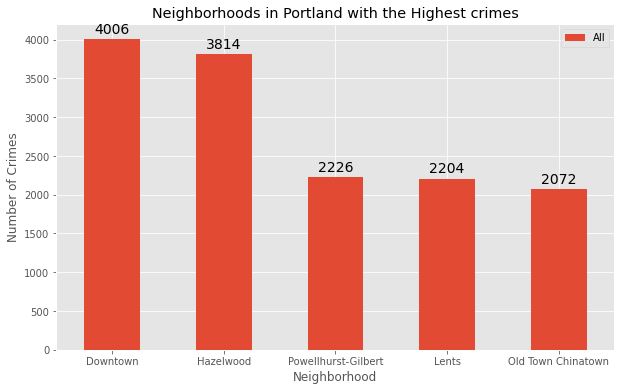

In [143]:
per_neigh = crime_neigh_top5[['Neighborhood','All']]

per_neigh.set_index('Neighborhood',inplace = True)

ax = per_neigh.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Neighborhood')
ax.set_title('Neighborhoods in Portland with the Highest crimes')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14,
               )

plt.show()

***Visualize 5 Neighborhoods with the lowest crime***

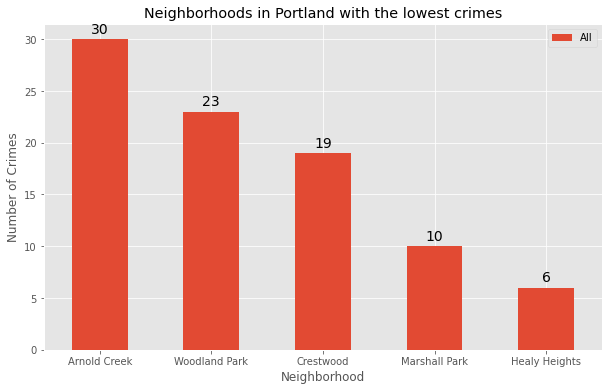

In [144]:
crime_neigh_low = port_crime_neigh.tail(5)
crime_neigh_low
per_neigh = crime_neigh_low[['Neighborhood','All']]

per_neigh.set_index('Neighborhood',inplace = True)

ax = per_neigh.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Neighborhood')
ax.set_title('Neighborhoods in Portland with the lowest crimes')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14,
               )

plt.show()

***Visualize Crime in Portland by Section***

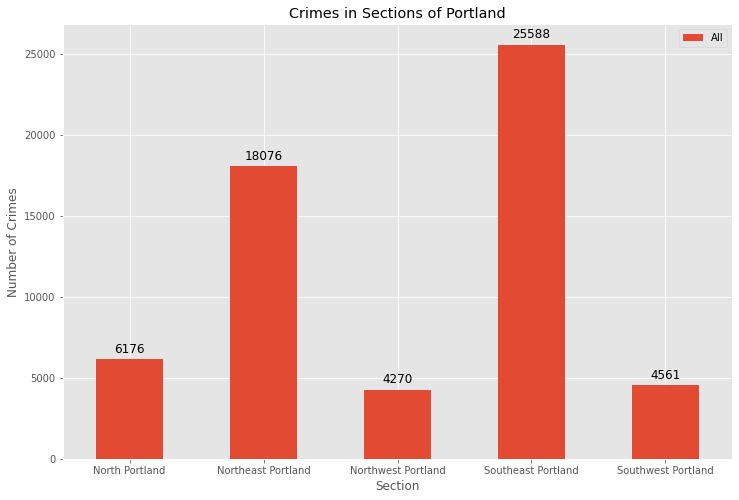

In [145]:
port_crime_cat5=port_crime_cat.head(5)
per_section = port_crime_cat5[['Section','All']]
per_section.set_index('Section',inplace = True)
ax = per_section.plot(kind='bar', figsize=(12, 8), rot=0)
ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Section')
ax.set_title('Crimes in Sections of Portland')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2, p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 12,
               )

plt.show()

***Based on analysis, Northwest Portland has the lowest crime, therefore it is most viable for opening a buisiness***

***Now we will explore the types of crimes in Northwest Portladn***

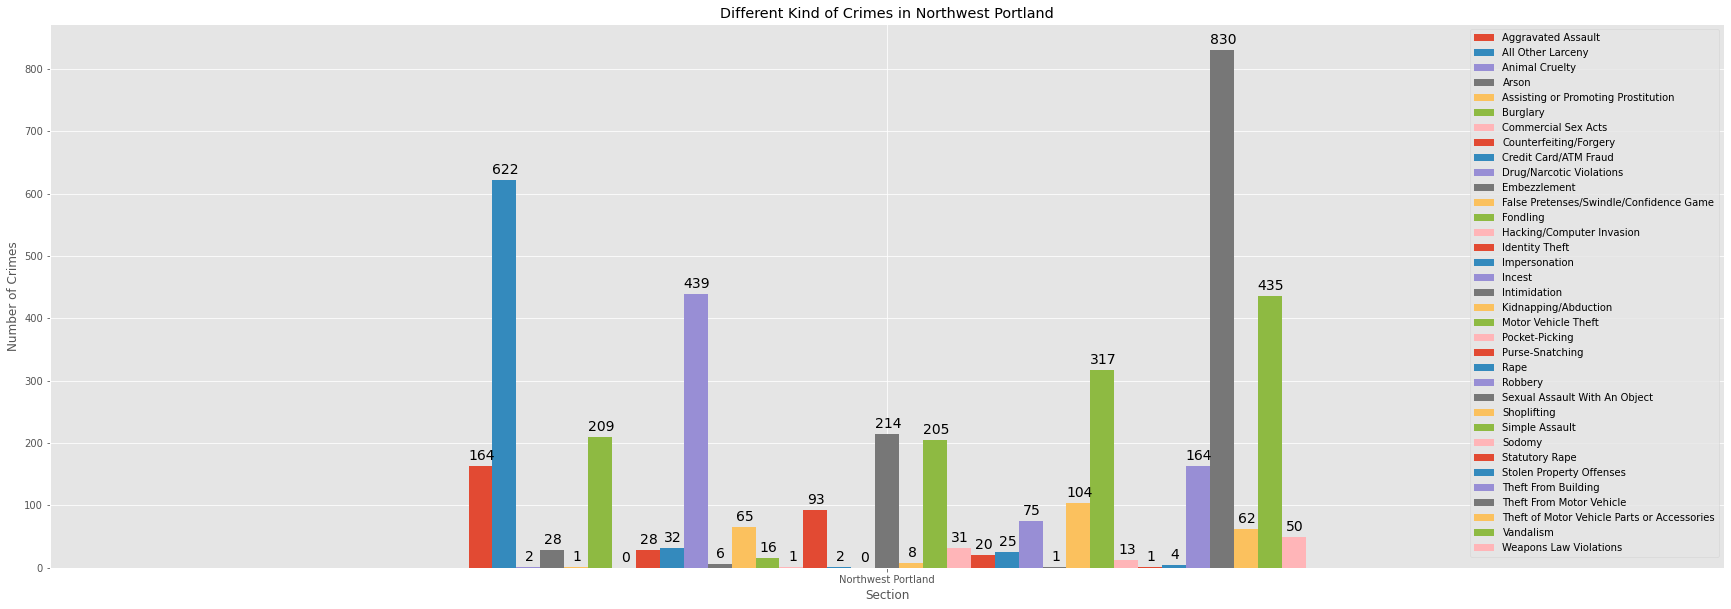

In [146]:
port_nw_df = port_crime_cat[port_crime_cat['Section'] == 'Northwest Portland']
port_nw_df = port_nw_df.sort_values(['All'], ascending = True, axis = 0)
port_nw_df.set_index('Section',inplace = True)
port_nw=port_nw_df.drop(['All','Drug Equipment Violations','Extortion/Blackmail','Murder and Non-negligent Manslaughter','Pornography/Obscene Material','Prostitution','Purchasing Prostitution','Theft From Coin-Operated Machine or Device','Welfare Fraud','Wire Fraud'],axis=1)
ax=port_nw.plot(kind='bar', figsize=(30, 10), rot=0)
ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Section')
ax.set_title('Different Kind of Crimes in Northwest Portland')
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=3), 
                (p.get_x()+p.get_width()/3., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(5, 10), 
                textcoords='offset points',
                fontsize = 14
               )
    ax.legend()

plt.show()


***To grasp the kind of crime in this area, we will focus on the top 5***

Since robbery, break and enter, shoplifting and theft are not the top types of crime in this area, it makes it ideal for opening a business

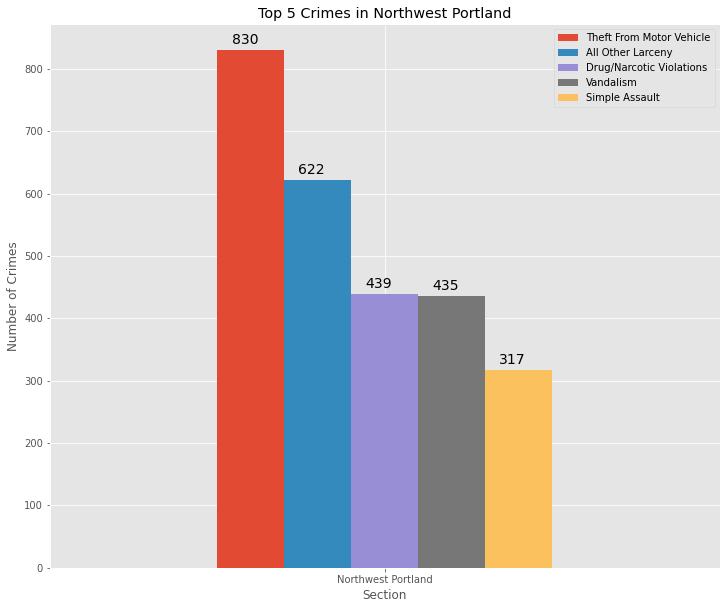

In [147]:
port_nw=port_nw.sort_values(by='Northwest Portland',axis=1,ascending=False)
port_nw_top5_crime=port_nw.iloc[:,0:5]
ax=port_nw_top5_crime.plot(kind='bar', figsize=(12, 10), rot=0)
ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Section')
ax.set_title('Top 5 Crimes in Northwest Portland')
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=3), 
                (p.get_x()+p.get_width()/3., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(5, 10), 
                textcoords='offset points',
                fontsize = 14
               )
    ax.legend()

plt.show()

# Part 3: Create a new consolidated dataset of the Neighborhoods, along with their section, crime data and the respective Neighbourhood's co-ordinates

OpenCage Geocoder will be used to fetch the cordinates, maps will be plotted using Folium

***Restrict dataframe to Northwest Portland***

In [148]:
port_nw_neigh=port_crime[port_crime['Section'] == 'Northwest Portland' ]
port_nw_neigh.reset_index(inplace=True, drop=True)
print('Number of Neighborhoods in Northwest Portland:', len(port_nw_neigh['Neighborhood'].unique()))
Neighbourhood=port_nw_neigh['Neighborhood'].unique()

Number of Neighborhoods in Northwest Portland: 7


***Create a new dataframe to store latitude and longitude date fetched from OpenCage Geocoder***

In [149]:
key= '9e0d32e4254c4390b5515200824d0a32'
geocoder = OpenCageGeocode(key)
Latitude=[]
Longitude=[]
Section=[]
for i in range(len(Neighbourhood)):
    address = '{}, Portland, OR, USA'.format(Neighbourhood[i])
    location = geocoder.geocode(address)
    Latitude.append(location[0]['geometry']['lat'])
    Longitude.append(location[0]['geometry']['lng'])
    Section.append('Northwest Portland')
print(Latitude, Longitude)



[45.5249344, 45.5051557, 45.541101, 45.6003301, 45.5274391, 45.5613759, 45.540806] [-122.6735157, -122.6108498, -122.706469, -122.7867791, -122.7131197, -122.7584579, -122.7743539]


In [150]:

nw_neig_dict = {'Neighbourhood': Neighbourhood,'Section': Section,'Latitude': Latitude,'Longitude':Longitude}
nw_neig_geo = pd.DataFrame(data=nw_neig_dict, columns=['Neighbourhood', 'Section', 'Latitude', 'Longitude'], index=None)
nw_neig_geo



,Neighbourhood,Section,Latitude,Longitude
0,Old Town Chinatown,Northwest Portland,45.524934,-122.673516
1,Northwest,Northwest Portland,45.505156,-122.610850
2,Northwest Industrial,Northwest Portland,45.541101,-122.706469
3,Linnton,Northwest Portland,45.600330,-122.786779
4,Hillside,Northwest Portland,45.527439,-122.713120
5,Forest Park,Northwest Portland,45.561376,-122.758458
6,Northwest Heights,Northwest Portland,45.540806,-122.774354


***Get the geographical co-ordinates of Portland and plot on Map using Folium***

In [151]:
address = 'Portland, OR, USA'

location = geocoder.geocode(address)
latitude = location[0]['geometry']['lat']
longitude = location[0]['geometry']['lng']

print('The geograpical coordinate of Portland, Oregon are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Portland, Oregon are 45.5202471, -122.6741949.


In [152]:
port_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, section, neighborhood in zip(nw_neig_geo['Latitude'], nw_neig_geo['Longitude'], nw_neig_geo['Section'], nw_neig_geo['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, section)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(port_map)  
    
port_map

# Part 4: Create a new consolidated dataset of the Neighborhoods, Sections, and the most common venues using the Four-Square API. Cluster the neighbourhoods and present the findings by plotting it on maps using Folium.

***Set up Foursquare***

In [153]:
#Four Square Credentials

CLIENT_ID = 'LHQM4JQRMQZGHNEEN5231LSPRMWJUVU50RXTN5ETZDPZEODV'
CLIENT_SECRET = 'IOWDBWY10UC32CNYF2Q5MAKG5BFPJDMF1EYF4BJOVWVWOLLK'
VERSION = '20191101'
LIMIT = 100

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: LHQM4JQRMQZGHNEEN5231LSPRMWJUVU50RXTN5ETZDPZEODV
CLIENT_SECRET:IOWDBWY10UC32CNYF2Q5MAKG5BFPJDMF1EYF4BJOVWVWOLLK


**Fetch the top 10 venues around a given neighborhood**

In [98]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Category']
    
    return(nearby_venues)

In [154]:
port_nw_venues = getNearbyVenues(names=nw_neig_geo['Neighbourhood'],
                                   latitudes=nw_neig_geo['Latitude'],
                                   longitudes=nw_neig_geo['Longitude']
                                  )

Old Town Chinatown
Northwest
Northwest Industrial
Linnton
Hillside
Forest Park
Northwest Heights


***Peak at the Created Dataframe***

In [156]:
print(port_nw_venues.shape)
port_nw_venues.head()

(95, 5)


,Neighbourhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Category
0,Old Town Chinatown,45.524934,-122.673516,The Hoxton,Hotel
1,Old Town Chinatown,45.524934,-122.673516,Cycle Portland Bike Tours & Rentals,Bike Shop
2,Old Town Chinatown,45.524934,-122.673516,Lan Su Chinese Garden,Garden
3,Old Town Chinatown,45.524934,-122.673516,Tope,Taco Place
4,Old Town Chinatown,45.524934,-122.673516,Voodoo Doughnut,Donut Shop


***Count the venues per neighborhood***

In [157]:

port_nw_venues.groupby('Neighbourhood').count().drop(['Neighborhood Latitude','Neighborhood Longitude','Venue Category'], axis = 1)

,Venue
Neighbourhood,
Forest Park,1
Hillside,9
Linnton,5
Northwest,32
Northwest Heights,4
Northwest Industrial,12
Old Town Chinatown,32


In [158]:
print('There are {} uniques categories.'.format(len(port_nw_venues['Venue Category'].unique())))

There are 63 uniques categories.


***Modeling using One Hot Encoding***

In [160]:
# one hot encoding
port_onehot = pd.get_dummies(port_nw_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
port_onehot['Neighbourhood'] = port_nw_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [port_onehot.columns[-1]] + list(port_onehot.columns[:-1])
port_onehot = port_onehot[fixed_columns]

#group by neighbourhoods
port_nw_grouped = port_onehot.groupby('Neighbourhood').mean().reset_index()
port_nw_grouped

,Neighbourhood,ATM,American Restaurant,Arcade,Arts & Crafts Store,BBQ Joint,Bagel Shop,Bakery,Bar,Beer Bar,Beer Store,Bike Shop,Brewery,Bridal Shop,Bus Stop,Cafeteria,Café,Coffee Shop,College Bookstore,Convenience Store,Dive Bar,Donut Shop,Ethiopian Restaurant,Food,Food Court,Food Truck,Forest,Fried Chicken Joint,Garden,Gas Station,Grocery Store,Gym,Hawaiian Restaurant,Heliport,Hotel,Ice Cream Shop,Japanese Curry Restaurant,Japanese Restaurant,Latin American Restaurant,Market,Massage Studio,Mexican Restaurant,Museum,Music Store,Music Venue,Park,Plaza,Recording Studio,Rock Club,Salad Place,Sandwich Place,Scenic Lookout,Sculpture Garden,Soccer Field,Sporting Goods Shop,Sports Bar,Steakhouse,Street Food Gathering,Taco Place,Tea Room,Trail,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Yoga Studio
0,Forest Park,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.000000,0.00,0.00000,0.00,0.000000,0.0000,0.00000,0.0000,0.00000,0.00000,0.00000,0.0,0.00000,0.0000,1.0,0.00000,0.00000,0.0,0.00000,0.000000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.0000,0.000000,0.00000,0.00,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000
1,Hillside,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.000000,0.00,0.00000,0.00,0.000000,0.0000,0.00000,0.0000,0.00000,0.00000,0.00000,0.0,0.00000,0.0000,0.0,0.00000,0.00000,0.0,0.00000,0.111111,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.111111,0.00000,0.111111,0.222222,0.00000,0.00000,0.00000,0.000000,0.0000,0.111111,0.00000,0.00,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.333333,0.00000,0.00000,0.00000
2,Linnton,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.2000,0.00000,0.00000,0.00000,0.000000,0.00,0.00000,0.00,0.000000,0.0000,0.00000,0.2000,0.00000,0.00000,0.00000,0.2,0.00000,0.0000,0.0,0.00000,0.00000,0.2,0.00000,0.000000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.2000,0.000000,0.00000,0.00,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000
3,Northwest,0.000000,0.03125,0.000000,0.000000,0.000000,0.00000,0.03125,0.0625,0.00000,0.00000,0.00000,0.000000,0.00,0.03125,0.00,0.000000,0.0625,0.00000,0.0625,0.03125,0.00000,0.03125,0.0,0.00000,0.1875,0.0,0.00000,0.00000,0.0,0.03125,0.000000,0.03125,0.00000,0.0000,0.03125,0.00000,0.03125,0.00000,0.00000,0.03125,0.0625,0.000000,0.03125,0.000000,0.000000,0.00000,0.03125,0.00000,0.031250,0.0000,0.000000,0.00000,0.00,0.000000,0.00000,0.00000,0.03125,0.00000,0.03125,0.000000,0.03125,0.03125,0.03125
4,Northwest Heights,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.000000,0.25,0.00000,0.25,0.000000,0.0000,0.00000,0.0000,0.00000,0.00000,0.00000,0.0,0.00000,0.0000,0.0,0.00000,0.00000,0.0,0.00000,0.000000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.000000,0.00000,0.000000,0.250000,0.00000,0.00000,0.00000,0.000000,0.0000,0.000000,0.00000,0.25,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000
5,Northwest Industrial,0.083333,0.00000,0.083333,0.083333,0.083333,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.166667,0.00,0.00000,0.00,0.166667,0.0000,0.00000,0.0000,0.00000,0.00000,0.00000,0.0,0.00000,0.0000,0.0,0.00000,0.00000,0.0,0.00000,0.083333,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.00000,0.083333,0.0000,0.000000,0.00000,0.00,0.166667,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000
6,Old Town Chinatown,0.000000,0.06250,0.000000,0.000000,0.000000,0.03125,0.00000,0.0000,0.03125,0.03125,0.03125,0.000000,0.00,0.03125,0.00,0.000000,0.0625,0.031

***Find the 5 most common venues across neighborhoods***

In [161]:
num_top_venues = 5

for hood in port_nw_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = port_nw_grouped[port_nw_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Forest Park----
                       venue  freq
0                     Forest   1.0
1                        ATM   0.0
2                   Heliport   0.0
3             Ice Cream Shop   0.0
4  Japanese Curry Restaurant   0.0


----Hillside----
            venue  freq
0           Trail  0.33
1            Park  0.22
2             Gym  0.11
3     Music Venue  0.11
4  Scenic Lookout  0.11


----Linnton----
               venue  freq
0     Sandwich Place   0.2
1        Gas Station   0.2
2               Food   0.2
3                Bar   0.2
4  Convenience Store   0.2


----Northwest----
                venue  freq
0          Food Truck  0.19
1   Convenience Store  0.06
2  Mexican Restaurant  0.06
3         Coffee Shop  0.06
4                 Bar  0.06


----Northwest Heights----
          venue  freq
0     Cafeteria  0.25
1          Park  0.25
2   Bridal Shop  0.25
3  Soccer Field  0.25
4           ATM  0.00


----Northwest Industrial----
                 venue  freq
0                 C

***Display the top 10 venues in each neighborhood***

In [163]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [164]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = port_nw_grouped['Neighbourhood']

for ind in np.arange(port_nw_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(port_nw_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(7)

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Forest Park,Forest,Yoga Studio,Café,Gas Station,Garden,Fried Chicken Joint,Food Truck,Food Court,Food,Ethiopian Restaurant
1,Hillside,Trail,Park,Music Venue,Gym,Museum,Scenic Lookout,Convenience Store,Café,Coffee Shop,College Bookstore
2,Linnton,Bar,Food,Gas Station,Convenience Store,Sandwich Place,College Bookstore,Dive Bar,Donut Shop,Ethiopian Restaurant,Yoga Studio
3,Northwest,Food Truck,Mexican Restaurant,Bar,Coffee Shop,Convenience Store,Massage Studio,Japanese Restaurant,Ice Cream Shop,Vietnamese Restaurant,Grocery Store
4,Northwest Heights,Cafeteria,Soccer Field,Bridal Shop,Park,Forest,Food Truck,Food Court,Food,Café,Donut Shop
5,Northwest Industrial,Sporting Goods Shop,Café,Brewery,ATM,Salad Place,Gym,BBQ Joint,Arts & Crafts Store,Arcade,Bagel Shop
6,Old Town Chinatown,Hotel,American Restaurant,Sandwich Place,Coffee Shop,Beer Store,Bike Shop,Market,Latin American Restaurant,Bus Stop,Japanese Curry Restaurant


***Cluster Neighborhoods***

In [121]:
# set number of clusters
kclusters = 3

port_grouped_clustering = port_nw_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(port_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 2, 1, 1, 2, 1, 1], dtype=int32)

In [122]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

port_merged = nw_neig_geo

# merge toronto_grouped with Portland data to add latitude/longitude for each neighborhood
port_merged = port_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

port_merged.head()

,Neighbourhood,Section,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Old Town Chinatown,Northwest Portland,45.524934,-122.673516,1,Hotel,American Restaurant,Sandwich Place,Coffee Shop,Beer Store,Bike Shop,Market,Latin American Restaurant,Bus Stop,Japanese Curry Restaurant
1,Northwest,Northwest Portland,45.505156,-122.610850,1,Food Truck,Mexican Restaurant,Bar,Coffee Shop,Convenience Store,Massage Studio,Japanese Restaurant,Ice Cream Shop,Vietnamese Restaurant,Grocery Store
2,Northwest Industrial,Northwest Portland,45.541101,-122.706469,1,Sporting Goods Shop,Café,Brewery,ATM,Salad Place,Gym,BBQ Joint,Arts & Crafts Store,Arcade,Bagel Shop
3,Linnton,Northwest Portland,45.600330,-122.786779,1,Bar,Food,Gas Station,Convenience Store,Sandwich Place,College Bookstore,Dive Bar,Donut Shop,Ethiopian Restaurant,Yoga Studio
4,Hillside,Northwest Portland,45.527439,-122.713120,2,Trail,Park,Music Venue,Gym,Museum,Scenic Lookout,Convenience Store,Café,Coffee Shop,College Bookstore


In [165]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(port_merged['Latitude'], port_merged['Longitude'], port_merged['Neighbourhood'], port_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

**Cluster 0**

In [166]:
port_merged.loc[port_merged['Cluster Labels'] == 0, port_merged.columns[[1] + list(range(3, port_merged.shape[1]))]]

,Section,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Northwest Portland,-122.758458,0,Forest,Yoga Studio,Café,Gas Station,Garden,Fried Chicken Joint,Food Truck,Food Court,Food,Ethiopian Restaurant


**Cluster 1**

In [167]:
port_merged.loc[port_merged['Cluster Labels'] == 1, port_merged.columns[[1] + list(range(3, port_merged.shape[1]))]]

,Section,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Northwest Portland,-122.673516,1,Hotel,American Restaurant,Sandwich Place,Coffee Shop,Beer Store,Bike Shop,Market,Latin American Restaurant,Bus Stop,Japanese Curry Restaurant
1,Northwest Portland,-122.610850,1,Food Truck,Mexican Restaurant,Bar,Coffee Shop,Convenience Store,Massage Studio,Japanese Restaurant,Ice Cream Shop,Vietnamese Restaurant,Grocery Store
2,Northwest Portland,-122.706469,1,Sporting Goods Shop,Café,Brewery,ATM,Salad Place,Gym,BBQ Joint,Arts & Crafts Store,Arcade,Bagel Shop
3,Northwest Portland,-122.786779,1,Bar,Food,Gas Station,Convenience Store,Sandwich Place,College Bookstore,Dive Bar,Donut Shop,Ethiopian Restaurant,Yoga Studio


**Cluster 2**

In [127]:
port_merged.loc[port_merged['Cluster Labels'] == 2, port_merged.columns[[1] + list(range(3, port_merged.shape[1]))]]

,Section,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Northwest Portland,-122.713120,2,Trail,Park,Music Venue,Gym,Museum,Scenic Lookout,Convenience Store,Café,Coffee Shop,College Bookstore
6,Northwest Portland,-122.774354,2,Cafeteria,Soccer Field,Bridal Shop,Park,Forest,Food Truck,Food Court,Food,Café,Donut Shop


# **Results and Discussion:**

The objective of this business problem was to help a small business in Portland Oregon figure out the most ideal location to open a coffee shop. 
This has been achieved by analyzing crime data in Portland from 2017 to help find the safest Section for a business to open. After finding this Section, the right neighborhood cluster was found using k-means clustering and show existing popular venues in the Section.

Based on the data, it seems that the safest Section to open a business is in Northwest Portland, as it has the least amount of crime.

It would be best to open a business somewhere in cluster 1 of this section, therefore the ideal location for a coffee shop to open would be in the Linnton neighborhood. It has the lowest crime and based on the top venues seems to gather a population that would be receptive to a local coffee shop

# **Conclusion**

Crime data was explored to understand what kind and where crime is most frequent in Portland Oregon, this helped to choose the safest Section. Finally, the top venues of each neighborhood in the Section were explored to figure out which neighborhood would be most suited for a new coffee shop.

The Linnton neighborhood came out as the ideal choice for a new coffee shop.